# Data Cleaning

According to the creator of the original dataset, the entire dataset was basically sent as a '[data dump](http://jse.amstat.org/v19n3/decock.pdf)' from the Asssessor's Office in Ames. We can expect that quite a lot of data cleaning will need to be done.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load in training and test datasets
housing = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
# We want to be able to see our entire dataframe on demand.
pd.options.display.max_rows = housing.shape[1]
pd.options.display.max_columns = housing.shape[1]

In [4]:
housing.shape

(2051, 81)

We have 2051 rows, with 81 variables for each row. These variables consist of 23 nominal, 23 ordinal, 14 discrete, and 20 continuous features (with 2 additional observation identifiers).

In [5]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


Judging by median scores for each feature, there's a large number of null values and zero values, espeically for certain variables like `Enclosed Porch`, `Pool Area`, `Fence`, `Pool QC`. 

We've got quite a bit of missing data -- most notably for `Garage Yr Blt` (missing 114 values i.e. only 94.4% complete) and `Lot Frontage` (missing 330 values i.e. only 84.0% complete). There are also a number of columns missing a smaller amount of values e.g. Garage Area with 2050 rows only. 

Let's start by visualizing all of this missing data to see if we can identify trends or patterns.

## Investigating Null/Zero values

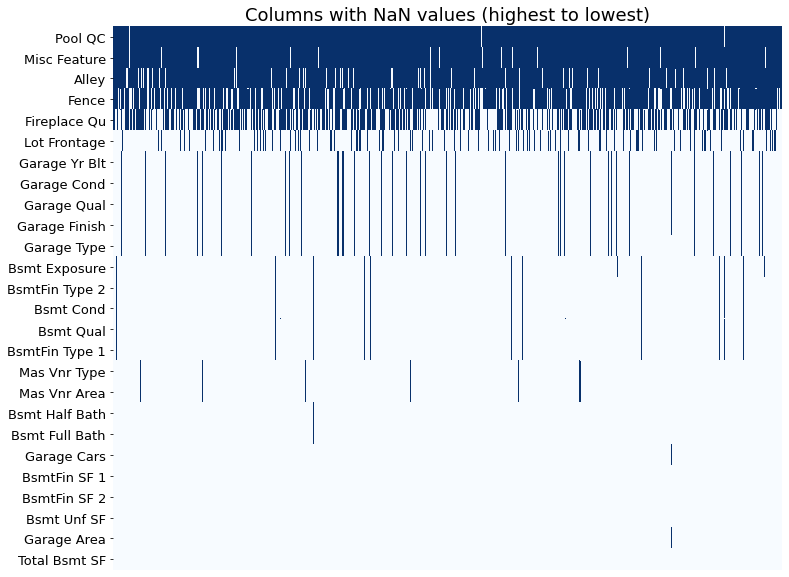

In [6]:
# Create mask to find variables with null values
null_values = housing.isnull().sum()[housing.isnull().sum() > 0].sort_values(ascending=False)

# Columns with missing values (sorted from highest to lowest)
plt.figure(figsize=(12,10))
ax = sns.heatmap(housing.isnull()[null_values.index].transpose(), xticklabels=False, cbar=False, cmap='Blues')
ax = plt.gca()
ax.tick_params(labelsize=13)
plt.title('Columns with NaN values (highest to lowest)', fontsize=18);

In [7]:
# Create dictionary of null values
null_dict = {f'{col}': housing[col].isnull().sum() for col in null_values.index}

# Find exact percentages of null values
print('NaN Values', end='\n--------------\n')
for key, value in null_dict.items():
    x = value / len(housing)
    print(f'{key}: {value}/{len(housing)} - {x*100:.2f}%')

NaN Values
--------------
Pool QC: 2042/2051 - 99.56%
Misc Feature: 1986/2051 - 96.83%
Alley: 1911/2051 - 93.17%
Fence: 1651/2051 - 80.50%
Fireplace Qu: 1000/2051 - 48.76%
Lot Frontage: 330/2051 - 16.09%
Garage Yr Blt: 114/2051 - 5.56%
Garage Cond: 114/2051 - 5.56%
Garage Qual: 114/2051 - 5.56%
Garage Finish: 114/2051 - 5.56%
Garage Type: 113/2051 - 5.51%
Bsmt Exposure: 58/2051 - 2.83%
BsmtFin Type 2: 56/2051 - 2.73%
Bsmt Cond: 55/2051 - 2.68%
Bsmt Qual: 55/2051 - 2.68%
BsmtFin Type 1: 55/2051 - 2.68%
Mas Vnr Type: 22/2051 - 1.07%
Mas Vnr Area: 22/2051 - 1.07%
Bsmt Half Bath: 2/2051 - 0.10%
Bsmt Full Bath: 2/2051 - 0.10%
Garage Cars: 1/2051 - 0.05%
BsmtFin SF 1: 1/2051 - 0.05%
BsmtFin SF 2: 1/2051 - 0.05%
Bsmt Unf SF: 1/2051 - 0.05%
Garage Area: 1/2051 - 0.05%
Total Bsmt SF: 1/2051 - 0.05%


#### Examining features with null values

Our five feature are particularly concerning, given that they are missing close to half or more of their values.

- `Pool QC` is an ordinal variable which measures pool quality, ranging from Excellent to NA (No Pool). We can surmise that almost all properties in Ames, Iowa have no pools.


- `Misc Feature` is a nominal variable measuring extra property features, including sheds, garages, tennis courts and elevators. Within this feature, there are only 65 values -- there are 56 properties with sheds, 4 with second garages, 1 tennis court, 1 eleveator and 3 'Others'. It's strange that this value is so low, given that properties are likely to a wide range and number of additional variables that aren't covered by our pre-existing variables. 


- `Alley` is a nominal variable that describes type of alley access to the property, such as whether it is gravel or paved. No alley access is indicating by NA. According to the [City of Ames](https://www.cityofames.org/government/departments-divisions-i-z/public-works/alley-maintenance), there are only 7.33 miles of alleys that serve residential or commercial properties.


- `Fence` is an ordinal variable that measures fence quality, that is, the ability of the fence to provide privacy from Good Privacy to NA (No Fence). Given that Ames is a generally urban area, it makes sense that the number of fences is low.


- `Fireplace Qu` is an ordinal variable measuring fireplace quality, ranging from excellent to NA (no fireplace). Our `Fireplaces` feature has 1,051 values greater than 0, which means that the 1000 missing values in Fireplace Qu line up nicely with the zero values in `Fireplace`.


- `Lot Frontage` is a continous variable measuring the linear feet of street connected to property. All properties should have some level of street frontage, meaning that the 300+ null values are likely areas.


- Our garage variables (`Garage Finish, Garage Cond, Garage Qual, Garage Yr Blt, Garage Type`) are ordinal and discrete variables measuring the finish, conditional, quality and year built of garages. A null value indicates that a number of properties (~5%) don't have garages. We'll verify this later on.


- Our basement variables (`Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Cond, Bsmt Qual`) are ordinal and continous variables measuring the rating, exposure, type, condition and height of the basement. A quick search of our dataframe reveals that there are 54 basements with a square footage of 0.


- `Mas Vnr Type` and `Mas Vnr Area` are nominal and continous variable measuring masonry veneer type and area. We can assume that a very small number of properties don't have masonry veeners i.e. not built out of brick or stone.


Lastly, we can see that a number of our variables still have unexplained null values. This likely reflects human error during data collection. We'll handle the imputation for these missing values later.

Text(0.5, 1.0, 'Columns with Zeroes (highest to lowest)')

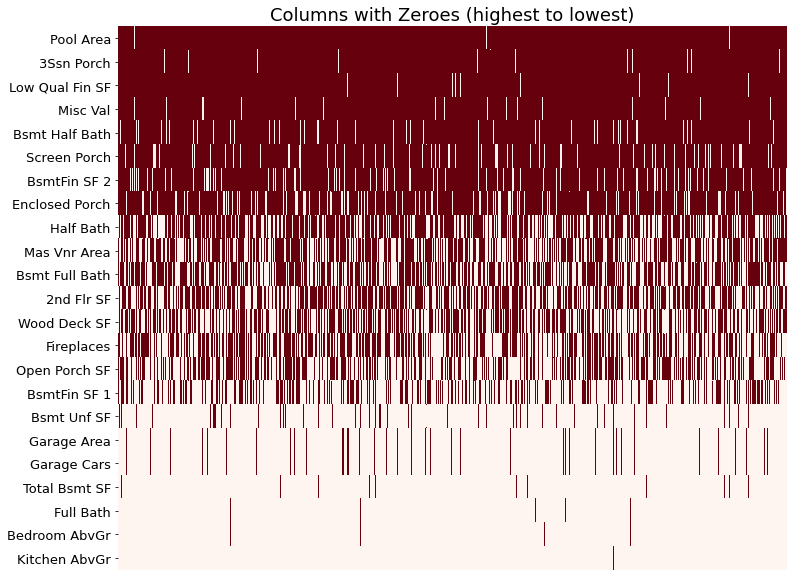

In [8]:
# Create mask to find all variables with zero values
zero_values = housing.isin([0]).sum().sort_values(ascending=False)
zero_values = zero_values[zero_values > 0]

# Columns with zeroes (sorted from highest to lowest)
plt.figure(figsize=(12,10))
sns.heatmap(housing.isin([0])[zero_values.index].transpose(), xticklabels=False, cbar=False, cmap='Reds')
ax = plt.gca()
ax.tick_params(labelsize=13)
plt.title('Columns with Zeroes (highest to lowest)', fontsize=18)

#### Examining features with zero values
- The number of zero values in `Pool Area` matches up perfectly with null values in `Pool QC` (2042/2042).


- `3Ssn Porch` is a continous variable measuring a three season porch area in square feet. We can surmise that 3Ssn porches are relatively rare.


- `Low Qual Fin SF` is a continous variable measuring low quality finished square feet for all floors -- it seems that most houses use low quality finishing.


- `Misc Val` is the value of miscellaneous proprety features -- we can see that the number of zeroes here matches property without Misc property features.


- `Bsmt Half Bath` and `Bsmt Full Bath` are discrete variables measuring whether a basement has full or half bathrooms. 1923 properties don't have half basement bathrooms, and 1200 properties also don't have full basement bathrooms. 849 properties have 1 or more basement bathrooms, while 824 have only 1 basement bathroom.


- `Screen Porch` is a continous variable measuring screen porch area in square feet. We can assume that 91% of properties don't have a screen porch.


- `BsmtFin SF 2` and `BsmtFin SF 1` are continous variable measuring of the finished square footage of Type 1 and Type 2 basements. We can see that mose properties are of Basement Type 1. A small minority of properties (8%) have unfinished basements, as indicated by `Bsmt Unf SF`


- `Enclosed Porch` is a continous variable measuring enclosed porch area in square feet. From the data, we can see that around 84% of properties don't have enclosed porches.


- `Mas Vnr Area` is a continous variable measuring masonry veneer area in square feet. From this, we can see that around 59% of properties don't have masonry veeners.


- `2nd Flr SF` is a continous variable measuring square footage of the second floor. From this, we can see that 58% of properties don't have a second floor.


- `Wood Deck SF` is a continous variable measuring wood deck area in square feet. From this, we can see that only 52% of properties have wood decks.


- `Fireplaces` is a discrete variable measuring number of fireplaces in a property. From this, we can see that around 48% of properties don't have fireplaces.


- `Open Porch SF` is a continous variable measuring open porch square footage -- 44% of houses don't have open porches.

In [9]:
# Create dictionary of zero values
zero_dict = {f'{col}': housing[col].isin([0]).sum() for col in zero_values.index}

# Find exact percentages of zero values
print('Zero Values', end='\n--------------\n')
for key, value in zero_dict.items():
    x = value / len(housing)
    print(f'{key}: {value}/{len(housing)} - {x*100:.2f}%')

Zero Values
--------------
Pool Area: 2042/2051 - 99.56%
3Ssn Porch: 2025/2051 - 98.73%
Low Qual Fin SF: 2018/2051 - 98.39%
Misc Val: 1986/2051 - 96.83%
Bsmt Half Bath: 1923/2051 - 93.76%
Screen Porch: 1870/2051 - 91.18%
BsmtFin SF 2: 1803/2051 - 87.91%
Enclosed Porch: 1724/2051 - 84.06%
Half Bath: 1308/2051 - 63.77%
Mas Vnr Area: 1216/2051 - 59.29%
Bsmt Full Bath: 1200/2051 - 58.51%
2nd Flr SF: 1191/2051 - 58.07%
Wood Deck SF: 1075/2051 - 52.41%
Fireplaces: 1000/2051 - 48.76%
Open Porch SF: 912/2051 - 44.47%
BsmtFin SF 1: 657/2051 - 32.03%
Bsmt Unf SF: 165/2051 - 8.04%
Garage Area: 113/2051 - 5.51%
Garage Cars: 113/2051 - 5.51%
Total Bsmt SF: 54/2051 - 2.63%
Full Bath: 8/2051 - 0.39%
Bedroom AbvGr: 5/2051 - 0.24%
Kitchen AbvGr: 2/2051 - 0.10%


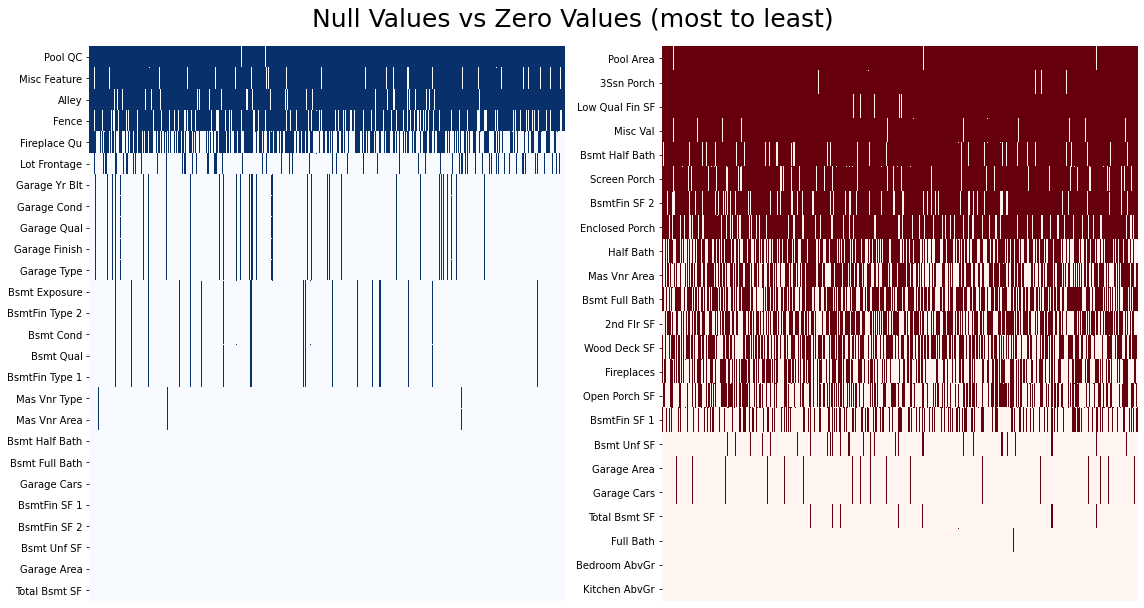

In [10]:
# Visualizing both NaN and zero values side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle('Null Values vs Zero Values (most to least)', fontsize=25, y=1.05)
ax = ax.ravel()
sns.heatmap(housing.isnull()[null_values.index].transpose(), xticklabels=False, cbar=False, cmap='Blues', ax=ax[0])
sns.heatmap(housing.isin([0])[zero_values.index].transpose(), xticklabels=False, cbar=False, cmap='Reds', ax=ax[1])
plt.tight_layout()

When comparing the two heatmaps side by side, we can see that some null values match up with  zero values. For example, `Pool QC` has 2042 null values, while `Pool Area` has 2042 zero values. SImilarly, `Misc Feature` has 1986 null values, which matches up with `Misc Val's` 1986 zero values. This is similarly reflected for our garage-related features. We can conclude that our data is mostly consistent between our ordinal features with null values and discrete features with zero values.

## Identifying Initial Outliers

The [documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) for the Ames housing dataset highlights that there are a number of outliers within the data -- specifically these are properties that have more than 4000 square feet. We'll also plot other outliers that were noticed earlier during our initial analysis of the data.

In [11]:
def plot_outliers(feature, x_val, annotate=0):
    # Create mask to select properties with more than 4,000 sqft
    outliers = housing[housing[feature] > x_val][[feature,'SalePrice']].values
    outliers
    
    # Plot outliers
    plt.figure(figsize=(12,6))
    ax = plt.gca()
    sns.scatterplot(data=housing, x=feature, y='SalePrice', ax=ax)
    sns.scatterplot(data=outliers, x=outliers[:,0], y=outliers[:,1], ax=ax, color='crimson', s=50)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)

    for i, _ in enumerate(outliers):
        xy=(-200, 15_000)
        if annotate == 1:
            ax.annotate(f'Outlier {i+1}', xy=(xy + outliers[-i-1]))
    plt.title(f'Scatterplot of {feature} versus Sale Price', fontsize=18)

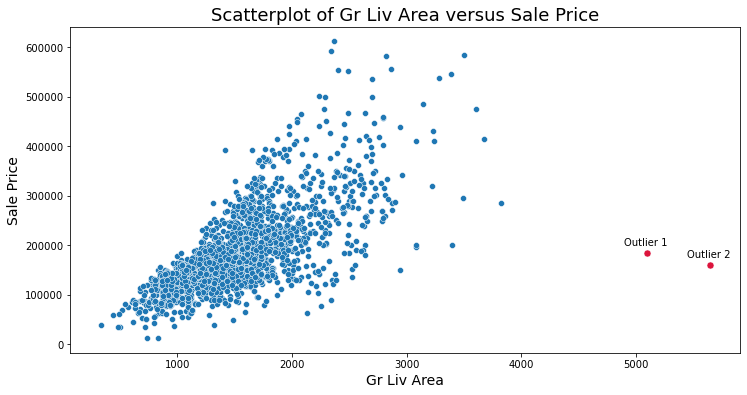

In [12]:
plot_outliers('Gr Liv Area', 4000, annotate=1)

In [13]:
# Drop outliers
housing.drop(housing[housing['Gr Liv Area'] > 4000].index, inplace=True);

Our outliers are obvious when plotting out Sale Price versus Living Area -- they have an extraordinarily low sales price in relation to their square footage. We'll drop these values in order to improve the accuracy of our model.

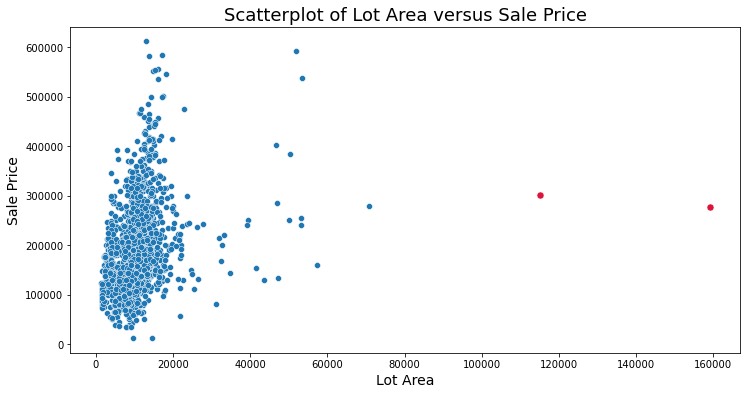

In [14]:
plot_outliers('Lot Area', 100_000)

While there seems to be a couple of outliers in terms of lot area, the other features of these house bring them in line with expected sale price numbers. Hence, we won't be dropping these outliers.

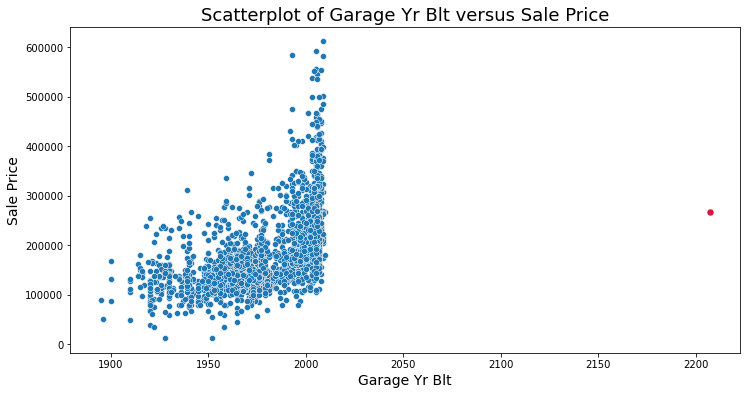

In [15]:
plot_outliers('Garage Yr Blt', 2200)

This outlier is clearly an error. Given that the house was built in 2007, we can safely assume that this was a typo and assign the garage year built as 2007.

In [16]:
housing['Garage Yr Blt'].replace({2207: 2007}, inplace=True)

## Cleaning Null Values & Encoding Variables

Time to clean our data! Let's start with our null values. 

We'll also look to encode our ordinal variables as integers. In certain cases, we won't be following the 0->1->2 order, as some variables have most houses in a certain category, which then makes that the 'average' category. In such cases, it might be batter to map this category as 0, and indicate whether other categories are below or above average. We'll rely on our EDA boxplot for this.

#### Pool Quality and Misc Features

In [17]:
housing['Pool QC'] = housing['Pool QC'].fillna('None')
housing['Pool QC'] = housing['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'None':0})

In [18]:
# One hot encoding for nominal variable
housing = pd.get_dummies(housing, columns=['Misc Feature']).drop('Misc Feature_Othr', axis=1)

#### Alleys and Fences

In [19]:
# According to our boxplot, privacy is more important than the quality of wood.
housing['Fence'] = housing['Fence'].fillna('None')
housing['Fence'] = housing['Fence'].map({'GdPrv':3,'MnPrv':2,'GdWo':1,'MnWw':1,'None':0})

In [20]:
housing['Alley'] = housing['Alley'].fillna('None')
housing = pd.get_dummies(housing, columns=['Alley']).drop('Alley_None', axis=1)

#### Fireplace Quality and Lot Frontage

In [21]:
housing['Fireplace Qu'] = housing['Fireplace Qu'].fillna('None')
housing['Fireplace Qu'] = housing['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

There are several ways we could impute missing values for lot frontage. We could use the total average of lot frontage across our data, or we could use neighbourhoods and PIDs to get a better estimate of lot frontage.  Given that [neighbourhoods](https://www.cityofames.org/home/showdocument?id=1024) seem to be a bit more precisely defined than [townships/sectors](https://www.cityofames.org/home/showdocument?id=1026), we'll opt to impute null values using the average lot frontage of the property's neighborhood. As a backup, we'll work with township/sectors (the first 3 digits of a property's PID). To prevent our model from underestimating variance, we'll use the standard deviation of a neighbourhood's lot frontage to artificially create variance. 

In [22]:
# Function to estimate lot frontage based on average of houses in neighborhood or township + section
def lot_frontage_gen(row):
    if np.isnan(row['Lot Frontage']):
        neighborhood = row['Neighborhood']
        nbrhd_std = housing[housing['Neighborhood'] == neighborhood]['Lot Frontage'].std()
        lot_frontage_mean = housing[housing['Neighborhood'] == neighborhood]['Lot Frontage'].mean()
        
        try:
            # Add in slight randomness to prevent understimation of variance
            row['Lot Frontage'] = lot_frontage_mean + np.random.randint(-nbrhd_std, nbrhd_std) / 1.25
        
        # If neighborhood is NAN
        except:
            pid = str(row['PID'])
            print(pid, '-- Neighborhood N/A -- imputing township average')
            sliced_pid = pid[0:3]
            lot_frontage_mean = housing[housing['PID'].astype(str).str.contains(sliced_pid)]['Lot Frontage'].mean()
            row['Lot Frontage'] = lot_frontage_mean
            
    return row

In [23]:
housing = housing.apply(lot_frontage_gen, axis=1)

916253320 -- Neighborhood N/A -- imputing township average
907230240 -- Neighborhood N/A -- imputing township average
916252170 -- Neighborhood N/A -- imputing township average


#### Garage Finish, Condition, Quality, Yr Built, Type

Before proceeding, let's check our various garage ordinal/numeric variables against the `Garage Area` feature.

In [24]:
# Mask to see number of houses with no garage area
housing[housing['Garage Area'] == 0][housing.columns[housing.columns.str.contains('Garage')]].count()

Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Garage Cars      113
Garage Area      113
Garage Qual        0
Garage Cond        0
dtype: int64

This suggests that are 113 properties with no garage.

In [25]:
# Fix ordinal garage variables
housing['Garage Type'] = housing['Garage Type'].fillna('None')
housing['Garage Finish'] = housing['Garage Finish'].fillna('None')
housing['Garage Qual'] = housing['Garage Qual'].fillna('None')
housing['Garage Cond'] = housing['Garage Cond'].fillna('None')

In [26]:
# Use one hot encoding for nominal feature -- Garage Type
housing = pd.get_dummies(housing, columns=['Garage Type']).drop('Garage Type_None', axis=1)

In [27]:
# Impute Garage Yr Blt with values from House Year Built
housing['Garage Yr Blt'] = housing['Garage Yr Blt'].fillna(housing['Year Built'])

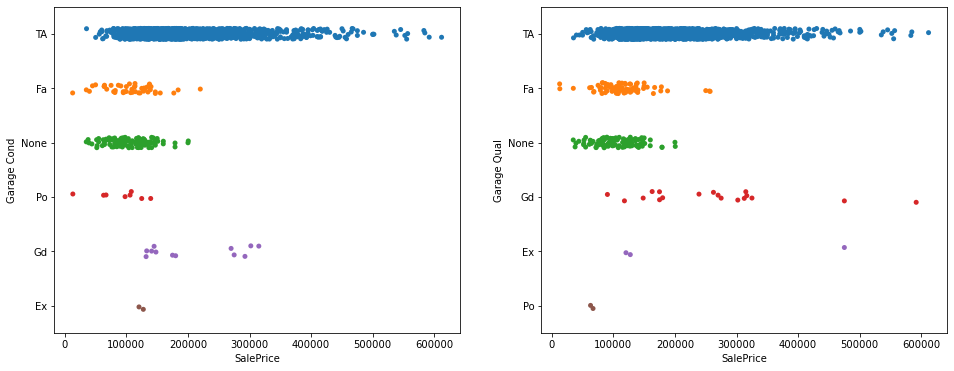

In [28]:
# Plot to demonstrate why we might choose not to use the conventional 5>4>3>2>1>0 scale for certain variables
# Here, we can see that most houses fall into the 'TA' category. This will be our 0 standard.
fig, ax = plt.subplots(ncols=2, figsize=(16,6))
ax = ax.ravel()
sns.stripplot(data=housing, x='SalePrice', y='Garage Cond', ax=ax[0])
sns.stripplot(data=housing, x='SalePrice', y='Garage Qual', ax=ax[1])

In [29]:
# Encode ordinal variables as integers
# Here, given that the majority of houses fall into the average (TA) category, we'll set that as 0.
# We'll also look to give houses with fair and no garages the a similar rating, given that they have a similar range & median. 
housing['Garage Cond'] = housing['Garage Cond'].map({'Ex':2,'Gd':1,'TA':0,'None':-0.5,'Fa':-0.5,'Po':-1,})
housing['Garage Qual'] = housing['Garage Qual'].map({'Ex':2,'Gd':1,'TA':0,'None':-0.5,'Fa':-0.5,'Po':-1,})
housing['Garage Finish'] = housing['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

In [30]:
# There's one property that has null values for Garage Cars and Area 
# We'll update this according to info from the Ames assessor website
housing[housing['Garage Cars'].isnull() == True][housing.columns[housing.columns.str.contains('Garage')]]

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd
1712,1923.0,0,NaN,NaN,-0.5,-0.5,0,0,0,0,0,1


According to the [PID](https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=592613725&KeyValue=0535304020) of this house, the garage is 280SF, can fit 1 car, and is an attached garage. The garage was also built in 1952. We'll update our features accordingly.

In [31]:
housing.at[1712, 'Garage Yr Blt'] = 1952
housing.at[1712, 'Garage Cars'] = 1
housing.at[1712, 'Garage Area'] = 280
housing.at[1712, 'Garage Type_Detchd'] = 0
housing.at[1712, 'Garage Type_Attchd'] = 1

#### Basement Exposure, Condition, Type, Quality

In [32]:
housing[housing['Total Bsmt SF'] == 0][housing.columns[housing.columns.str.contains('Bsmt')]].count()

Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1      54
BsmtFin Type 2     0
BsmtFin SF 2      54
Bsmt Unf SF       54
Total Bsmt SF     54
Bsmt Full Bath    53
Bsmt Half Bath    53
dtype: int64

Similar to our garage variables, our basement variables have null values where there is no basement. There seem to be around 53 properties with no basement.

In [33]:
# Fix ordinal basement variables
housing['Bsmt Qual'] = housing['Bsmt Qual'].fillna('None')
housing['Bsmt Cond'] = housing['Bsmt Cond'].fillna('None')
housing['Bsmt Exposure'] = housing['Bsmt Exposure'].fillna('None')
housing['BsmtFin Type 1'] = housing['BsmtFin Type 1'].fillna('None')
housing['BsmtFin Type 2'] = housing['BsmtFin Type 2'].fillna('None')

In [34]:
# As most basements have a condition of 0, we're using it as the standard and working backwards from there.
# Moving from a 5>4>3>2>1>0 standard to a 2>1>0>-0.25>-0.5>-1 standard greatly improved the accuracy of my model.
housing['Bsmt Cond'] = housing['Bsmt Cond'].map({'Ex':2,'Gd':1,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})
housing['Bsmt Exposure'] = housing['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

# According to our boxplot, basements of excellent quality (or height) tend to have much higher sales prices.
housing['Bsmt Qual'] = housing['Bsmt Qual'].map({'Ex':4,'Gd':2,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})

# Only good quality basements seem to have a strong correlation with higher sales prices.
housing['BsmtFin Type 1'] = housing['BsmtFin Type 1'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})
housing['BsmtFin Type 2'] = housing['BsmtFin Type 2'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})

In [35]:
# There are 2 properties that have null values for other basement variables
housing[housing['Bsmt Full Bath'].isnull() == True][housing.columns[housing.columns.str.contains('Bsmt')]]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,-0.5,-0.5,0,-0.5,0.0,-0.5,0.0,0.0,0.0,NaN,NaN
1327,-0.5,-0.5,0,-0.5,NaN,-0.5,NaN,NaN,NaN,NaN,NaN


For the first row returned to us, we can assign discrete values of 0 for Bsmt Full Bath and Bsmt Half Bath, given that the Total Bsmt SF indicates that there is no basement for these properties.

In [36]:
housing['Bsmt Full Bath'] = housing['Bsmt Full Bath'].fillna(0)
housing['Bsmt Half Bath'] = housing['Bsmt Half Bath'].fillna(0)

The second row has null values for all continuous basement variables. An online search of this property's [PID](https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=1726851672&KeyValue=0903230120) shows that the property has no basement, meaning we can fill in our discrete variables with 0.

In [37]:
housing[housing.columns[housing.columns.str.contains('Bsmt')]] = \
housing[housing.columns[housing.columns.str.contains('Bsmt')]].fillna(0)

#### Masonry Veneer Type and Area

A manual search of PIDs shows that properties with null values for `Mas Vnr Type` and `Mas Vnr Area` are simply properties without Masonry Veneers. Accordingly, we can impute these values as None or 0.

In [38]:
housing['Mas Vnr Type'] = housing['Mas Vnr Type'].fillna('None')

# There's no clear order here, so we'll use one hot encoding.
housing = pd.get_dummies(data=housing, columns=['Mas Vnr Type']).drop('Mas Vnr Type_None', axis=1)

In [39]:
housing['Mas Vnr Area'] = housing['Mas Vnr Area'].fillna(0)

## Encoding Categorical Features

Due to our previous efforts, we only have 27 categorical features left to deal with. Of these remaining features, 10 are ordinal features and 17 are nominal features. Let's start by using label enconding to change our ordinal features to numeric features.

In [40]:
# For reference
ordinal_feats = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 
                 'HeatingQC', 'Electrical', 'Kitchen Qual', 'Functional', 'Paved Drive']

#### Lot Shape and Land Slope

Based on our boxplot, `Lot Shape` appears to have very little correlation with sales price. Houses with irregular lot shapes actually seem to have higher median prices -- this may suggest that people are willing to pay a higher price for properties that differ from the norm. Accordingly, we can give more weight to irregular shapes over regular shapes. `Land Slope` seems to follow a similar pattern.

In [41]:
housing['Lot Shape'] = housing['Lot Shape'].map({'IR1':1,'IR2':1,'IR3':1,'Reg':0})

In [42]:
housing['Land Slope'] = housing['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':1})

#### Utilities, Heating Quality and Electrical

The impact of `Utilities` will likely be marginal, given that almost all houses all public utilities. We'll look to drop this feature alter on. But let's map it anyway for posterity. For `Heating QC`, properties with excellent heating quality and condition have noticeably higher median sale prices. Similar to `Utilities`, a large majority of houses have Standard Circuit Breakers. Houses without circuit breakers have a lower median sales price.

In [43]:
housing['Utilities'] = housing['Utilities'].map({'AllPub':0,'NoSewr':-1,'NoSeWa':-1})

In [44]:
housing['Heating QC'] = housing['Heating QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [45]:
housing['Electrical'] = housing['Electrical'].map({'SBrkr':1,'FuseA':0.5,'FuseF':0,'FuseP':0,'Mix':0})

#### External Quality and Condition

These two features evaluates the quality and condition of the material on the exterior of the feature. For `Exter Qual`, properties with an excellent quality material have much higher median sale prices, with price steadily decreasing in proportion to quality. For `Exter Cond`, a similar version of this relationship exists, albeit slightly weaker. Given that most houses fall into the average or good categories, we want houses with an excellent score to have a heavier weightage.

In [46]:
housing['Exter Qual'] = housing['Exter Qual'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})

In [47]:
housing['Exter Cond'] = housing['Exter Cond'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})

#### Kitchen Qual

When looking at `Kitchen Qual`, we can see that excellent quality kitches have much higher median sales prices. Most houses have kitchens that fall into the average category, meaning that we want houses with an excellent score to have a slightly heavier weightage.

In [48]:
housing['Kitchen Qual'] = housing['Kitchen Qual'].map({'Ex':4.5,'Gd':3,'TA':2,'Fa':1,'Po':0})

#### Functional and Paved Drive

When it comes to functionality, almost all houses have a typical level of functionality. Thus, we'll give houses with defects a greater than proportionate negative weightage. In general, houses with either a full or partial `Paved Drive` have higher median sales scores than those that don't, so we'll give houses with no paved drive a slightly higher negative weightage.

In [49]:
housing['Functional'] = housing['Functional'].map({'Typ':1,'Min1':0,'Min2':0,'Mod':-2,'Maj1':-3,'Maj2':-3,'Sev':-6,'Sal':-8})

In [50]:
housing['Paved Drive'] = housing['Paved Drive'].map({'Y':1,'P':0.5,'N':0})

## Encoding of Nominal Variables

We'll one hot encode the rest of our nominal features as they generally don't have any form of rank or order.

In [51]:
# Collect remaining features
cat_features = [col for col in housing.select_dtypes(include=['category', 'object']).columns]

In [52]:
housing = pd.get_dummies(data=housing, columns=cat_features)

In [53]:
# Checking for any remaining null values
housing.isnull().sum().max()

0

#### Changing Nominal to Categorical Feature

`MS SubClass` is better treated as a categorical variable instead of a numerical variable, given that each subclass has different characteristics and will affect sale price differently.

In [54]:
housing = pd.get_dummies(data=housing, columns=['MS SubClass'])

In [55]:
housing.shape

(2049, 228)

After data cleaning and encoding, we now have 2049 observations (two outliers were dropped) and 228 features.

### Correlation Heatmap of Sales Price and Variables

At this point, we can do a quick visualization to get a rough sensing of how our current features are correlated with sale price.

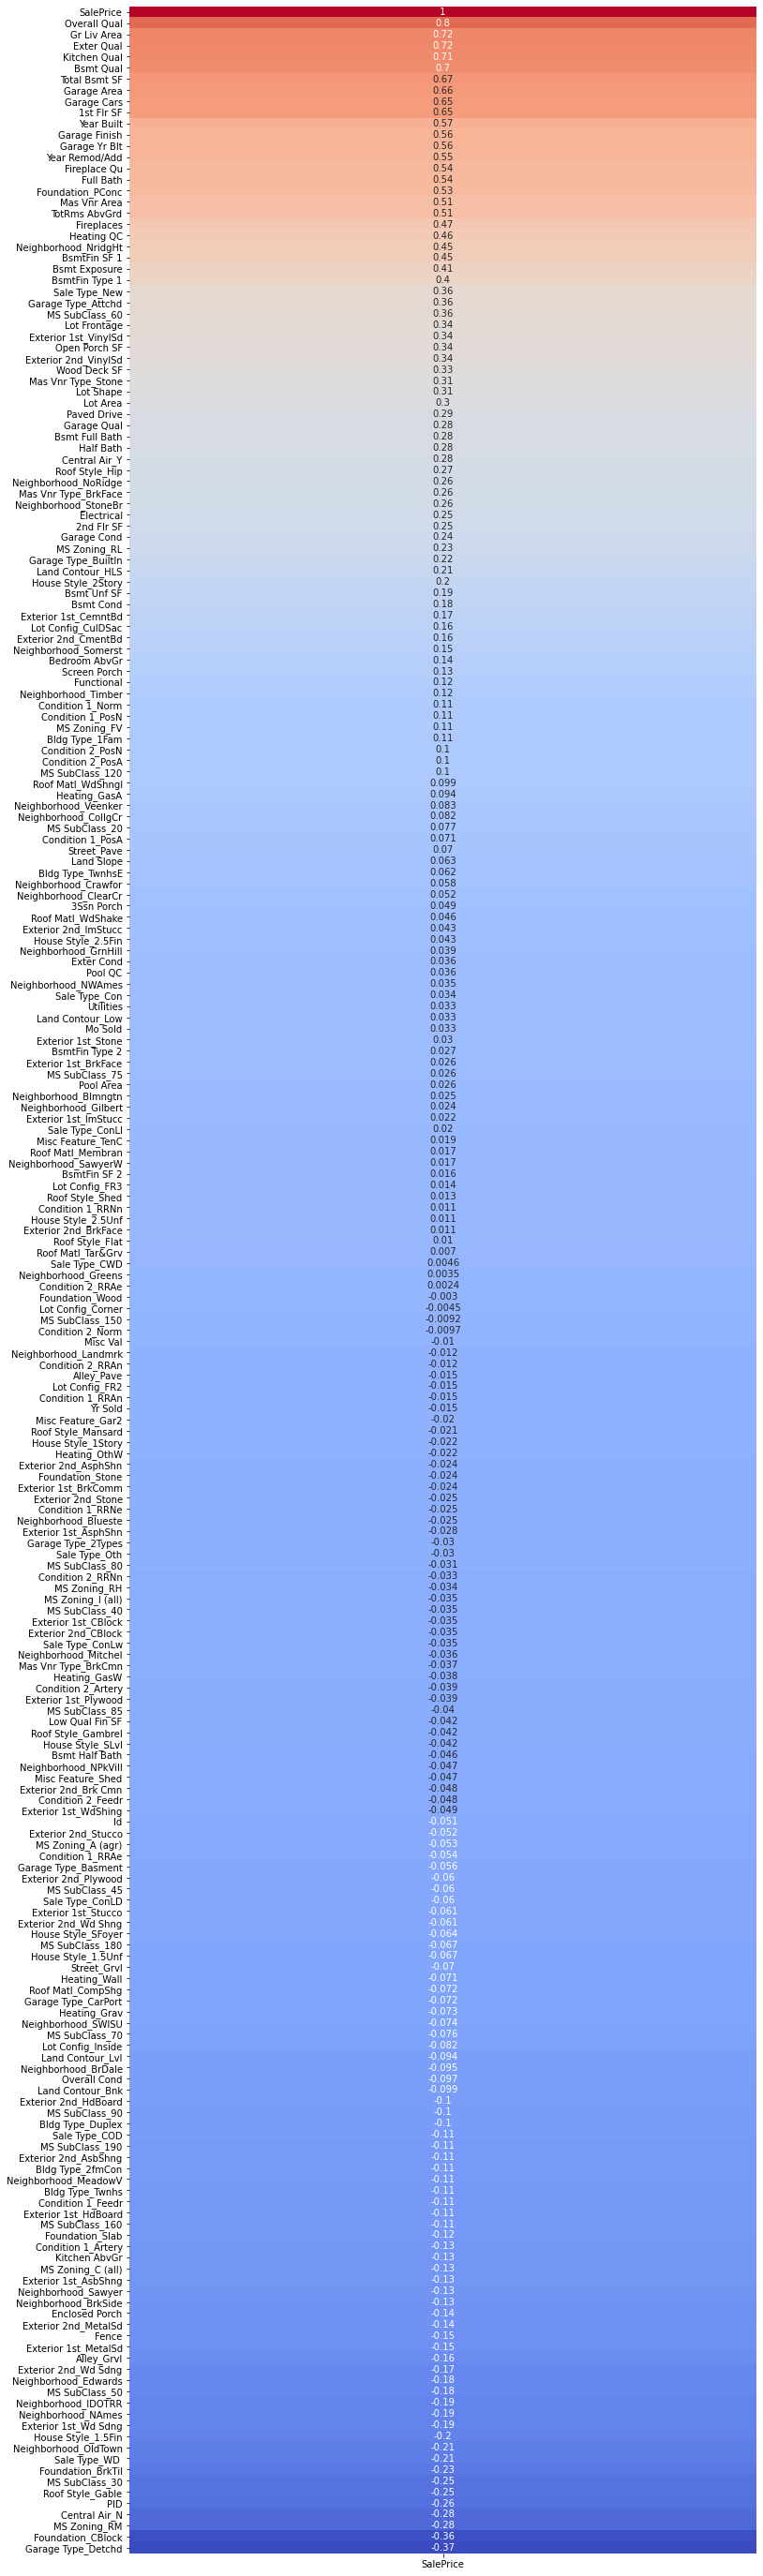

In [56]:
# Check correlation for all variables
plt.figure(figsize=(12,50))
sns.heatmap(housing.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), cmap='coolwarm', annot=True, cbar=False)

Based on our heatmap, our top 20 most postively correlated features are:
1. Overall Qual: 0.803462
2. Gr Liv Area: 0.719463
3. Kitchen Qual: 0.712871
4. Exter Qual: 0.712200
5. Bsmt Qual: 0.680469
6. Total Bsmt SF: 0.665116
7. Garage Area: 0.655499
8. 1st Flr SF: 0.648252
9. Garage Cars: 0.648671
10. Year Built: 0.572405
11. Garage Finish: 0.558566
12. Year Remod/Add: 0.550872
13. Garage Yr Blt: 0.556903
14. Fireplace Qu: 0.539484
15. Full Bath: 0.538225
16. Foundation_PConc: 0.529500
17. Mas Vnr Area: 0.511273
18. TotRms AbvGrd: 0.509775
19. Fireplaces: 0.473783
20. Heating QC: 0.466242

It seems that our <b>features measuring quality have a very high correlation with sale price</b>, followed by features that measure of square footage. We can see that the time based features have some correlation with sale price, but have a weaker correlation as compared to quality/size features.

Our top 10 most negatively correlated features are:

1. Neighborhood_OldTown: -0.208418
2. Sale Type_WD: -0.213536
3. Foundation_BrkTil: -0.229950
4. MS SubClass_30: -0.248572
5. Roof Style_Gable: -0.250019
6. PID: -0.255068
7. Central Air_N: -0.277425
8. MS Zoning_RM: -0.282032
9. Foundation_CBlock: -0.355768
10. Garage Type_Detchd: -0.370485

Our negative correlated features seem to range from location to sale type, and involve practical features such as whether a home has a detached garage or whether it has central airconditioning. This seems to make sense from a customer standpoint. Old houses seem to have a lower sale price (as indicated by `MS SubClass_30`), and residential areas with medium density (`MS Zoning_RM`) seem to have houses a with lower sale price. 

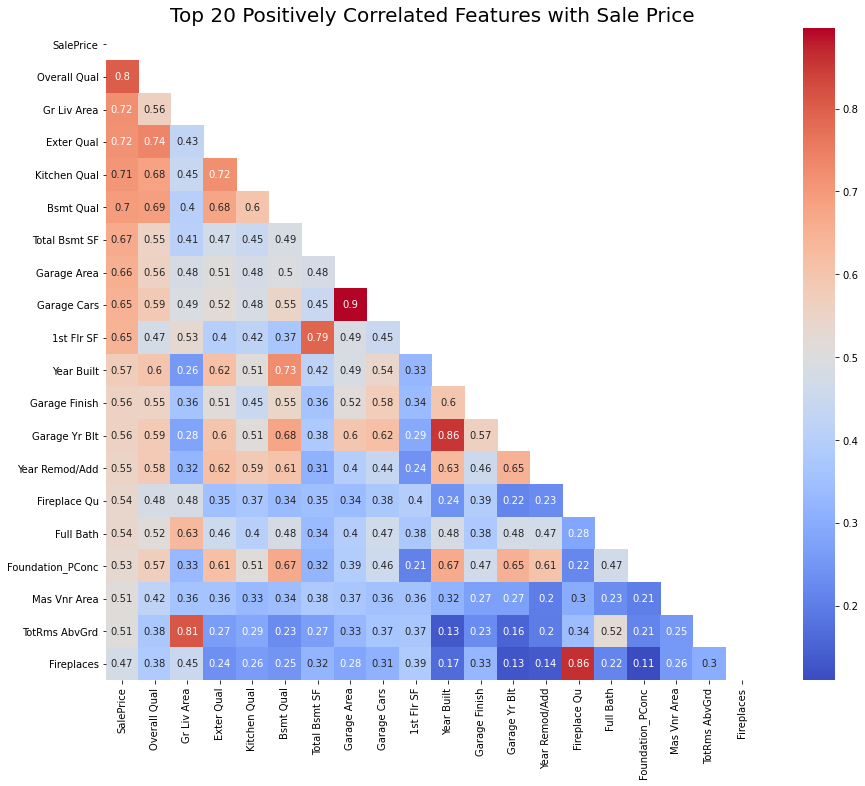

In [57]:
# Create mask for our top twenty positively correlated features
top_corr = housing.corr()['SalePrice'].sort_values(ascending=False).head(20).index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(housing[top_corr].corr(), dtype=bool))
ax = sns.heatmap(housing[top_corr].corr(), cmap='coolwarm', mask=mask, square=True, annot=True)
plt.title('Top 20 Positively Correlated Features with Sale Price', fontsize=20);

Looking at the heat map above, we can observe that some features like `Overal Qual` and `Exter Qual` generally have a <b>high level of multicollinearity</b>. There are also variables that have a high degree of pairwise correlation e.g. `Garage Cars` and `Garage Area`, as well as `Garage Yr Blt` and `Year Built`.

This is a problem, as using too many correlated features may cause our model to consider too many unnecessary features, leading to what is known as the <b>curse of dimensionality</b>. In other words, high correlation between our variables might reduce the precision of our estimate coefficients, which might then weaken the statistical power of our model. 

In our next notebook, we'll look to use dimension reduction techniques to try to remove redundant features and decease multicollinearity.

In [58]:
def clean_encode(df):    
    df['Pool QC'] = df['Pool QC'].fillna('None')
    df['Pool QC'] = df['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'None':0})
    
    # One hot encoding for nominal variable
    df = pd.get_dummies(df, columns=['Misc Feature']).drop('Misc Feature_Othr', axis=1)
    
    # According to our boxplot, privacy is more important than the quality of wood.
    df['Fence'] = df['Fence'].fillna('None')
    df['Fence'] = df['Fence'].map({'GdPrv':3,'MnPrv':2,'GdWo':1,'MnWw':1,'None':0})
    df['Alley'] = df['Alley'].fillna('None')
    df = pd.get_dummies(df, columns=['Alley']).drop('Alley_None', axis=1)
    df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')
    df['Fireplace Qu'] = df['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

    # Function to estimate lot frontage based on average of houses in neighborhood or township + section
    def lot_frontage_gen(row):
        if np.isnan(row['Lot Frontage']):
            neighborhood = row['Neighborhood']
            nbrhd_std = df[df['Neighborhood'] == neighborhood]['Lot Frontage'].std()
            lot_frontage_mean = df[df['Neighborhood'] == neighborhood]['Lot Frontage'].mean()

            try:
                # Add in slight randomness to prevent understimation of variance
                row['Lot Frontage'] = lot_frontage_mean + np.random.randint(-nbrhd_std, nbrhd_std) / 1.25

            # If neighborhood is NAN
            except:
                pid = str(row['PID'])
                print(pid, '-- Neighborhood N/A -- imputing township average')
                sliced_pid = pid[0:3]
                lot_frontage_mean = df[df['PID'].astype(str).str.contains(sliced_pid)]['Lot Frontage'].mean()
                row['Lot Frontage'] = lot_frontage_mean

        return row
    df = df.apply(lot_frontage_gen, axis=1)
    
    # Fix ordinal garage variables
    df['Garage Type'] = df['Garage Type'].fillna('None')
    df['Garage Finish'] = df['Garage Finish'].fillna('None')
    df['Garage Qual'] = df['Garage Qual'].fillna('None')
    df['Garage Cond'] = df['Garage Cond'].fillna('None')
    
    # Use one hot encoding for nominal feature -- Garage Type
    df = pd.get_dummies(df, columns=['Garage Type']).drop('Garage Type_None', axis=1)
    
    # Impute Garage Yr Blt with values from House Year Built
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])
    df['Garage Cond'] = df['Garage Cond'].map({'Ex':2,'Gd':1,'TA':0,'None':-0.5,'Fa':-0.5,'Po':-1,})
    df['Garage Qual'] = df['Garage Qual'].map({'Ex':2,'Gd':1,'TA':0,'None':-0.5,'Fa':-0.5,'Po':-1,})
    df['Garage Finish'] = df['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

    # Fix ordinal basement variables
    df['Bsmt Qual'] = df['Bsmt Qual'].fillna('None')
    df['Bsmt Cond'] = df['Bsmt Cond'].fillna('None')
    df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('None')
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('None')
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('None')
    
    # Encode ordinal variables as integers
    df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex':2,'Gd':1,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})
    df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
    
    ## According to our boxplot, basements of excellent quality (or height) tend to have much higher sales prices.
    df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex':4,'Gd':2,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})
    
    ## Only good quality basements seem to have a strong correlation with higher sales prices.
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})
    
    df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
    
    df = pd.get_dummies(data=df, columns=['Mas Vnr Type']).drop('Mas Vnr Type_None', axis=1)
    df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
    
    df['Lot Shape'] = df['Lot Shape'].map({'IR1':1,'IR2':1,'IR3':1,'Reg':0})
    df['Land Slope'] = df['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':1})
   
    df['Utilities'] = df['Utilities'].map({'AllPub':0,'NoSewr':-1,'NoSeWa':-1})
    df['Heating QC'] = df['Heating QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
    df['Electrical'] = df['Electrical'].map({'SBrkr':1,'FuseA':0.5,'FuseF':0,'FuseP':0,'Mix':0})
    df['Electrical'] = df['Electrical'].fillna(0)
   
    df['Exter Qual'] = df['Exter Qual'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})
    df['Exter Cond'] = df['Exter Cond'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})
    df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex':4.5,'Gd':3,'TA':2,'Fa':1,'Po':0})
    df['Functional'] = df['Functional'].map({'Typ':1,'Min1':0,'Min2':0,'Mod':-2,'Maj1':-3,'Maj2':-3,'Sev':-6,'Sal':-8})
    df['Paved Drive'] = df['Paved Drive'].map({'Y':1,'P':0.5,'N':0})

    # Collect remaining features and one hot encode
    cat_features = [col for col in df.select_dtypes(include=['category', 'object']).columns]
    df = pd.get_dummies(data=df, columns=cat_features)
    
    # Numerical to categorical
    df = pd.get_dummies(data=df, columns=['MS SubClass'])
    
    return df

In [59]:
test = clean_encode(test)

In [60]:
# Final check for null values
housing.isnull().sum()[housing.isnull().sum() > 0], test.isnull().sum()[test.isnull().sum() > 0]

(Series([], dtype: int64), Series([], dtype: int64))

In [61]:
# Save cleaned housing data
housing.to_csv('./datasets/housing_cleaned.csv', index=False)

In [62]:
# Save cleaned test data
test.to_csv('./datasets/test_cleaned.csv', index=False)